<a href="https://colab.research.google.com/github/mpily/basic-ml-course/blob/Lecture_06/Solution6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
print(X.shape, y.shape)

(20640, 8) (20640,)


#Task 1 (1pt)


*   Split the data into a training and validation set with 80%/20% distribution
*   Use train_test_split function from sklearn for this. Remember to set the random_state parameter to 0



In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=0)


#Task 2 (1 pt)

Train a decision tree model to predict house price. Remember to use the training set X_train to train the model

*     Train a model with max_depth=1. Remember to set the random_state=0



*      Visualize the tree you just trained. You can refer to the code from the lecture video.
*      Which feature was used to split the data (choose 1 and write you answer in a comment below the code
    *    MedInc
    *   AveRooms
    *    AveBedrms
    *    HouseAge



['MedHouseVal']


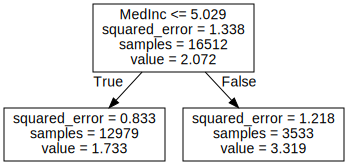

In [4]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# for visualization
print(data.target_names)
import graphviz
tree = DecisionTreeRegressor(max_depth=1,random_state=0)
tree.fit(X_train,y_train)
graphviz.Source(export_graphviz(tree,
                                feature_names=feature_names,
                                class_names=data.target_names))
# median income

In [ ]:
DecisionTreeRegressor?

# Task 3(2pt)

*    Train a decision tree with max_depth=3.
*    Don't forget random_state=0
*    Print the mean square error on the validation set.
*    What is the mean square error you just calculate.

Write you answer in the comment below the code.

In [10]:
# Train the model
tree = DecisionTreeRegressor(max_depth=3,random_state=0)
tree.fit(X_train,y_train)
graphviz.Source(export_graphviz(tree,
                                feature_names=feature_names,
                                class_names=data.target_names))

# Print the mean squared error
prediction = tree.predict(X_valid)
print(prediction)
print(y_valid)
mse = np.sum((prediction - y_valid)**2)/y_valid.size
print(mse)
# What's the mean squared error you just calculate:
#0.6533119456700849

[1.87727065 2.57344339 1.87727065 ... 1.87727065 2.57344339 1.87727065]
[1.369 2.413 2.007 ... 1.286 2.595 1.676]
0.6533119456700849


# Task 4(2pt)
Tune the max_depth parameter of the model.
*     Try different values for max_depth : [5,6,7,8,9,10,11,12]
*     Don't forget random_state=0
*     Print out the mean square error for each value of max_depth
*     What is the best value for max_depth ? Write your answer in the comment below the code



In [11]:
# Your code here

for val in range(5,13):
  tree = DecisionTreeRegressor(max_depth=val,random_state=0)
  tree.fit(X_train,y_train)
  graphviz.Source(export_graphviz(tree,
                                feature_names=feature_names,
                                class_names=data.target_names))
  prediction = tree.predict(X_valid)
  mse = np.sum((prediction - y_valid)**2)/y_valid.size
  print(val,' : ',tree.score(X_valid,y_valid), ' : ', mse)

# What's the best max_depth: 9 then it reduces.

5  :  0.5857247671583736  :  0.5401962207714344
6  :  0.6177698126912781  :  0.4984109265539033
7  :  0.6474580599597188  :  0.4596987909870867
8  :  0.6579285437883257  :  0.44604575226916726
9  :  0.6691882365248636  :  0.4313636207268005
10  :  0.6571783546875503  :  0.4470239650247865
11  :  0.659273981958957  :  0.444291361570811
12  :  0.6545196496283374  :  0.45049079652055624


Let's switch to rando forest 

Train a random forest model with 
*   n_estimators=20
*   random_state = 0
What is the mean square error on the validation set? Write your answer in the comment below the code.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Your code here
random_forest = RandomForestRegressor(n_estimators=20,random_state=0)
random_forest.fit(X_train,y_train)
prediction = random_forest.predict(X_valid)
mse = np.sum((prediction - y_valid)**2)/y_valid.size
print(mse)
#The mean square error on the validation set
#mse = 0.26946775214546204

0.26946775214546204


#Task 6 (2pt)
Tune different hyperparameter of random forest
*   random_state = 0
*   Try different values of max_features:[0.5,'sqrt','log2']
*   For each of these values of max_features, try different values of n_estimators from 10 to 100(with step size 10): i.e [10,20,30,...]
Optionally set n_jobs=-1 to train faster

In [14]:
#Your code here
max_features = [0.5,'sqrt','log2']
for val in max_features:
  for estimator in range(10,110,10):
    random_forest = RandomForestRegressor(max_features=val,n_estimators = estimator,n_jobs = -1)
    random_forest.fit(X_train,y_train)
    print(val,estimator,random_forest.score(X_valid,y_valid))

0.5 10 0.7897400261978632
0.5 20 0.8082072777744307
0.5 30 0.8082341832733088
0.5 40 0.808425854361602
0.5 50 0.8108757532664137
0.5 60 0.8083127088858947
0.5 70 0.8112595238195877
0.5 80 0.8114187684448741
0.5 90 0.8115354392517786
0.5 100 0.8133275269960808
sqrt 10 0.7836482140955217
sqrt 20 0.8066046477656403
sqrt 30 0.80793229003989
sqrt 40 0.8105424181838411
sqrt 50 0.8141011677807553
sqrt 60 0.813956062386739
sqrt 70 0.8154648457577921
sqrt 80 0.8139964921263985
sqrt 90 0.8163305469899492
sqrt 100 0.816568133757357
log2 10 0.7868378909761118
log2 20 0.8123867351883411
log2 30 0.8149313467378811
log2 40 0.8157717757560532
log2 50 0.812446371891479
log2 60 0.8172168150375385
log2 70 0.8184753170063189
log2 80 0.818401303694246
log2 90 0.8170201655672988
log2 100 0.8169061539582352


# Task 7 (1pt)
Extract feature importance of the model Train a random forest model with 
*  n_estimators = 10
*  max_dept = 15
* random_state = 0
Get featrue importance attribute of the model. You can use the feature_importances_ attribute
What is the most important feature? write your answer in a comment in the code cell below

In [15]:
# Train your model
random_forest = RandomForestRegressor(n_estimators=10,random_state=0,max_depth=15)
random_forest.fit(X_train,y_train)
# Get feature importance
feature_importances = random_forest.feature_importances_

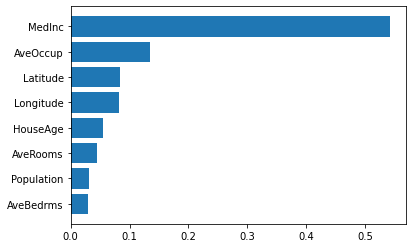

In [16]:
df_importances = pd.DataFrame()
df_importances['feature'] = feature_names
df_importances['importance'] = feature_importances
df_importances.sort_values(by='importance', inplace=True)

plt.barh(range(df_importances.shape[0]), df_importances.importance)
plt.yticks(range(df_importances.shape[0]), df_importances.feature)

plt.show()

#The most important feature:
#MedInc

Trying to implement a simple DecisionTreeRegressor from scratch:
Will consist of: 


1.   Class Node
2.   Class tree

Node Class:
Action -- if leaf node make prediction otherwise go to left child or right child

Class Tree:
list of nodes + root node(node at index 0)

At leaf node, use linear regression to get parameters of intercept and axis

when making a prediction go down tree to leaf then make prediction based on coeffecients and intercepts of particular leaf. 
How to create a Tree:

Given a training set:


```
for every parameter:
  1.   split data based on this parameter -- say median value into two groups
  2.   divide split data into 2 groups(test and training).
  3.   Train model based on 1 group
  4.   try to predict value of second group
  5.   get MSE
  6.   choose split that minimises MSE
```





In [17]:
def training(X, y):
    appended_column    = np.array([[1] for i in range(X.shape[0])])
    X                  = np.append(X,appended_column,axis=1)
    xtranspose_times_x = X.T @ X
    theta              = np.linalg.inv(xtranspose_times_x) @ X.T @ y
    alpha              = theta[-1]
    theta              = theta[:len(theta)-1]
    return (theta, alpha)

In [18]:
def prediction(X, coefficients, intercept):
    intercept_vector = np.array([intercept for i in range(X.shape[0])])
    y_predict        =  X @ coefficients + intercept_vector
    return y_predict

In [96]:
class Node:
  def __init__(self, isLeaf = False, conditionParam = 0,conditionVal = 0,coef = np.zeros, intc = 0):
    self.is_leaf = isLeaf
    if isLeaf:
      self.intercept    = intc
      self.coefficients = coef
    else:
      self.condition_parameter = conditionParam
      self.condition_value     = conditionVal

  def update_children(self,left_child, right_child):
    self.left_child  = left_child
    self.right_child = right_child

  def make_prediction(self,values):
    if self.is_leaf:
      #print(self.coefficients)
      values = values.reshape((-1,self.coefficients.shape[0]))
      #print(prediction(values,self.coefficients,self.intercept))
      x = prediction(values,self.coefficients,self.intercept)
      #print("leaf ", x)
      return x
    else:
      #print(values[self.condition_parameter], self.condition_value)
      if values[self.condition_parameter] <= self.condition_value:
        #print("go left")
        x = self.left_child.make_prediction(values)
        #print("par ", x)
        return x
      else:
        #print("go right")
        x = self.right_child.make_prediction(values)
        #print("par ",x)
        return x




In [42]:
def test_node_val(Xvals,ytarg):
  if Xvals.shape[0] < 100:
    print(Xvals.shape)
    assert False
  random_indices_train = np.random.choice(Xvals.shape[0],size=100,replace=False)
  random_indices_test  = np.random.choice(Xvals.shape[0],size=50,replace=False)
  coef,intc = training(Xvals[random_indices_train,:],ytarg[random_indices_train])
  y_pred = prediction(Xvals[random_indices_test,:],coef,intc)
  mse = np.sum((y_pred - ytarg[random_indices_test])**2)/ytarg.size
  return mse

In [55]:
def create_node(Xvals,ytarg):
  if Xvals.shape[0] <= 500:
    coef,intc = training(Xvals,ytarg)
    leaf_node = Node(isLeaf=True,coef=coef,intc=intc)
    return leaf_node
  else:
    big_x   = np.zeros(5)
    big_y   = np.zeros(5)
    small_x = np.zeros(5)
    small_y = np.zeros(5)
    min_mse = 1e18
    best_feature = 0
    medians = np.median(Xvals,axis=0)
    for feature in range(Xvals.shape[1]):
      big_indices = Xvals[:,feature] > medians[feature]
      small_indices = Xvals[:,feature] <= medians[feature]
      total_mse = test_node_val(Xvals[big_indices],ytarg[big_indices]) + test_node_val(Xvals[small_indices],ytarg[small_indices])
      if total_mse < min_mse:
        best_feature = feature
        big_x = Xvals[big_indices]
        big_y = ytarg[big_indices]
        small_x = Xvals[small_indices]
        small_y = ytarg[small_indices]
    next_node = Node(isLeaf=False,conditionParam = best_feature,conditionVal=medians[best_feature])
    next_node.update_children(create_node(big_x,big_y),create_node(small_x,small_y))
    return next_node


In [94]:
class Tree:
  def __init__(self,test_X, test_y):
     self.root = create_node(test_X,test_y)

  def make_prediction(self,value):
    return self.root.make_prediction(value)

In [98]:
regTree = Tree(X_train,y_train)
y_corr  = []

for value in X_valid:
  #print(value.shape)
  x = regTree.make_prediction(value)
  #print(x)
  y_corr.append(x)
y_pred = np.array(y_corr).flatten()
print(y_pred)
print(y_valid.shape)
mse = np.sum((y_pred - y_valid)**2)/y_valid.size
print(mse)
#performs poorly very high mse :(  of 2.111730120303337

[3.04676781 3.20326836 1.9689398  ... 1.40122369 2.70905652 2.29287716]
(4128,)
2.111730120303337
